This file is for performing the parameter sweeps for the tripartite system (i.e. the NV ensemble and the YIG) that Hanfeng asked for.  The yig_nv_cooling file was more for playing around with parameters to see what might be possible, so its a bit unwieldy

## Imports

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import sympy as sym

In [2]:
# Set font size of plot elements\n",
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Functions

We don't need the cavity spectrum here, so we'll omit the functions that were used to calculate that

In [3]:
def temp_from_photons(ω, num_photons):
    """
    function for calculating the temperature given the number of photons
    :param ω:           the frequency of the photons
    :param num_photons: the number of photons
    :returns:           the temperature
    """
    hbar_ov_k = 7.639e-12 
    return hbar_ov_k * ω / np.log(1 / num_photons + 1)

In [4]:
def photons_from_temp(ω, temp):
    """
    function for calculating the number of photons from a thermal bath
    :param ω:           the frequency of the photons
    :param temp:        the temperature of the bath
    :returns:           the number of photons
    """
    hbar_ov_k = 7.639e-12
    return (np.exp(hbar_ov_k * ω / temp) - 1) ** -1

In [5]:
def output_spec(ω, g, r, gy, χ, κ, γ, nT, nc, Δ, Ω):
    """
    function for calculating the full output spectrum of the cavity including the YIG and NV ensemble.  note that the output spectrum for
    the just the nv ensemble coupled to the cavity can be obtained by setting gy, χ, ny, and Ω to 0
    :param ω:  the frequency
    :param g:  the cooperativity of the NV ensemble and the cavity
    :param r:  the damping rate of the NV ensemble
    :param gy: the cooperativity of the YIG and the cavity
    :param χ:  the damping rate of the YIG
    :param κ:  the output coupling rate
    :param γ:  the internal loss rate
    :param nT: the number of photons in the thermal bath
    :param nc: the number of photons in the cold bath (i.e. the NV ensemble)
    :param Δ:  the cavity-spin detuning
    :param Ω:  the cavity-YIG detuning
    :returns:  the output spectrum
    """
    # Define M to collect coupling rates together
    M = κ + γ

    # Numerator will be a + b + c, denominator will be d + e + f
    a = (r ** 2 / 4 + ω ** 2) * (χ ** 2 / 4 + (ω - Ω) ** 2) * κ * γ * nT
    b = g ** 2 * (χ ** 2 / 4 + (ω - Ω) ** 2) * nc * κ * r
    c = gy ** 2 * (r ** 2 / 4 + ω ** 2) * nT * κ * χ
    a2 = ((κ - γ) / 2 + 1j * (ω - Δ)) * (r / 2 - 1j * ω) * (χ / 2 - 1j * (ω - Ω))
    b2 = g ** 2 * (χ / 2 - 1j * (ω - Ω))
    c2 = gy ** 2 * (r / 2 - 1j * ω)
    num = a + b + c + nT * np.abs(a2 - b2 - c2) ** 2

    d = ((κ + γ) / 2 - 1j * (ω - Δ)) * (r / 2 - 1j*ω) * (χ / 2 - 1j * (ω - Ω))
    e = g ** 2 * (χ / 2 - 1j * (ω - Ω))
    f = gy ** 2 * (r / 2 - 1j*ω)
    den = np.abs(d + e + f) ** 2

    return num / den

## Turn on YIG slowly

In [6]:
# First set constant parameters
ωc = 2 * np.pi * 2.87e9         # cavity frequency in Hz
κ = 1e5                         # cavity output coupling rate in Hz
T = 5                           # temperature of the cavity in K
Q = 2.5e4                       # quality factor of the cavity at T
γ = ωc / Q                      # the internal loss rate of the cavity in Hz
g = 1e5                         # coupling of the NV ensemble to the cavity in Hz 
r = g                           # linewidth of the assumed lorenztian distribution of the spin frequencies
P = 0.7                         # polarization of the NV ensemble
nc = 0.5 * (1 - P) / P          # effective number of photons in the cold bath
nT = photons_from_temp(ωc, T)   # the number of thermal photons in the cavity

# Set detuning for yig to 0 - other yig parameters will be set later
Ω = 0                           # detuning of the yig frequency in Hz

In [7]:
# Set up parameter sweeps over ω and Δ using numpy's meshgrid function
ω = np.linspace(-4, 4, 1000) * 1e6
Δ = np.linspace(-4, 4, 1000) * 1e6

ωm, Δm = np.meshgrid(ω, Δ)

In [8]:
# Set up list of gy values
gy_list = [10**i for i in range(4, 9)]
ω_Δ_sweep_out_spec_list = [output_spec(ωm, g, r, _, _, κ, γ, nT, nc, Δm, Ω) for _ in gy_list]

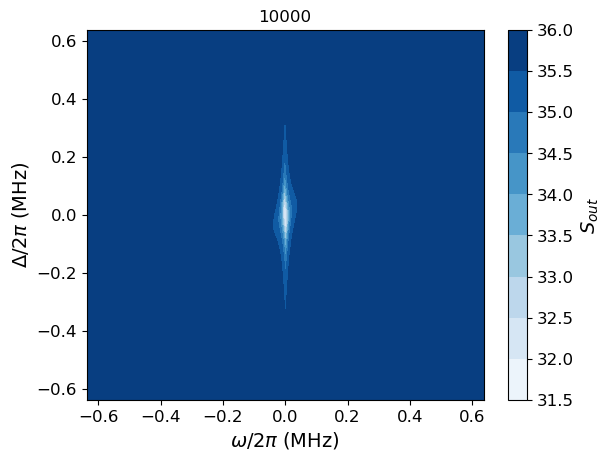

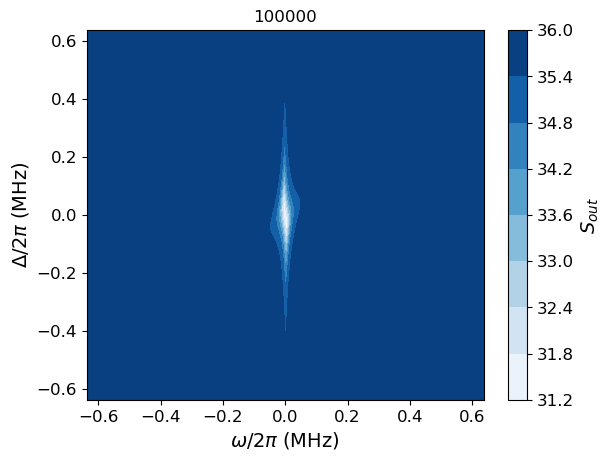

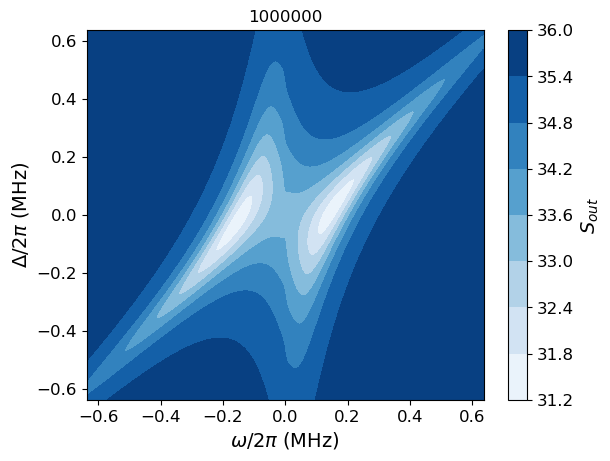

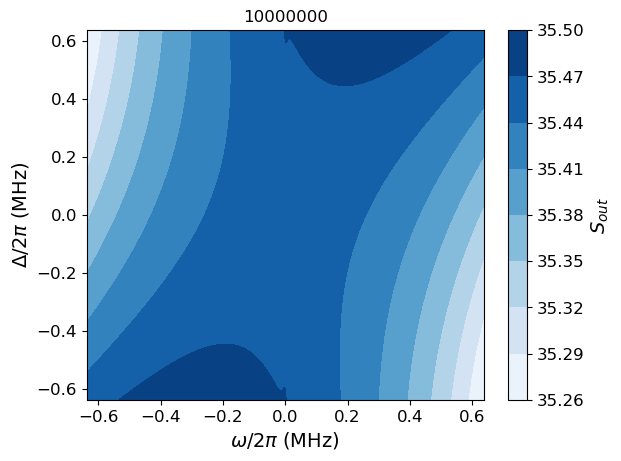

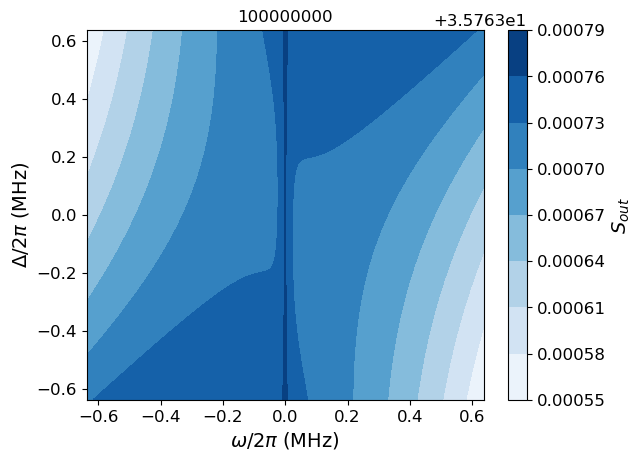

In [9]:
# Plot results
for i in range(len(gy_list)):
    plt.figure(i)
    plt.title(str(gy_list[i]))
    plt.contourf(ωm / (2 * np.pi * 1e6), Δm / (2 * np.pi * 1e6), ω_Δ_sweep_out_spec_list[i], cmap='Blues')
    plt.xlabel("$\\omega / 2\\pi$ (MHz)")
    plt.ylabel("$\\Delta / 2\\pi$ (MHz)")
    plt.colorbar(label='$S_{out}$')

So these results suggest that gy=1e6 is the sweet spot so to speak

In [10]:
ω = 0
gy = np.logspace(5, 9, 1000)

gym, Δm = np.meshgrid(gy, Δ)

In [11]:
gy_Δ_sweep_out_spec_a = output_spec(2.15 * 2*np.pi* 1e6, g, r, gym, gym, κ, γ, nT, nc, Δm, Ω)
gy_Δ_sweep_out_spec_b = output_spec(ω, g, r, gym, gym, κ, γ, nT, nc, Δm, Ω)
gy_Δ_sweep_out_spec_c = output_spec(-2.15 * 2*np.pi* 1e6, g, r, gym, gym, κ, γ, nT, nc, Δm, Ω)
gy_Δ_sweep_out_spec = 0.33 * (gy_Δ_sweep_out_spec_a + gy_Δ_sweep_out_spec_b + gy_Δ_sweep_out_spec_c)

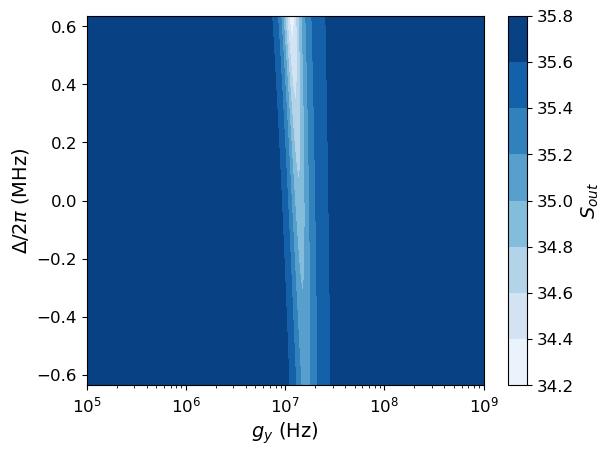

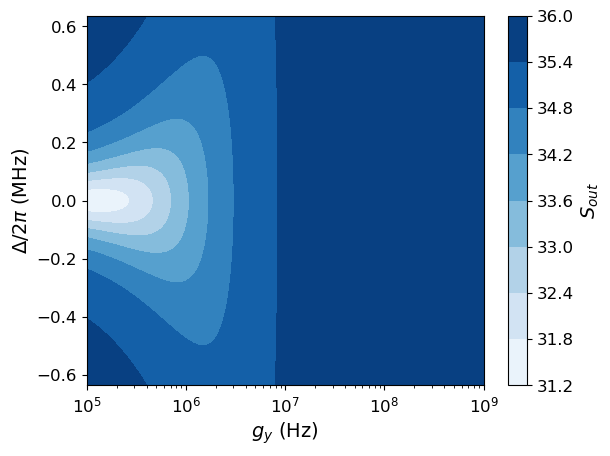

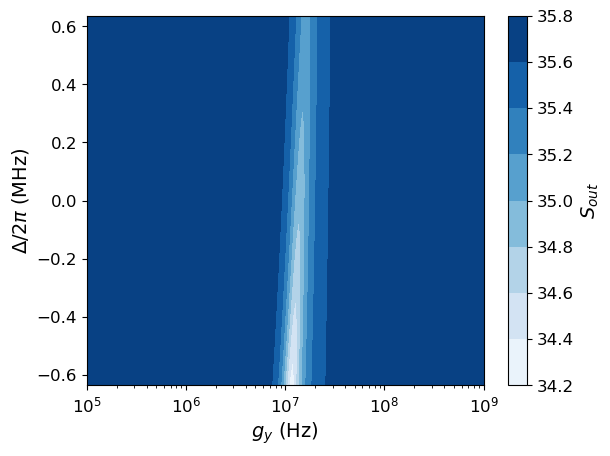

In [12]:
plt.figure(1)
plt.contourf(gym, Δm / (2 * np.pi * 1e6), gy_Δ_sweep_out_spec_a, cmap='Blues')
plt.xlabel("$g_y$ (Hz)")
plt.xscale('log')
plt.ylabel("$\\Delta / 2\\pi$ (MHz)")
plt.colorbar(label='$S_{out}$')

plt.figure(2)
plt.contourf(gym, Δm / (2 * np.pi * 1e6), gy_Δ_sweep_out_spec_b, cmap='Blues')
plt.xlabel("$g_y$ (Hz)")
plt.xscale('log')
plt.ylabel("$\\Delta / 2\\pi$ (MHz)")
plt.colorbar(label='$S_{out}$')

plt.figure(3)
plt.contourf(gym, Δm / (2 * np.pi * 1e6), gy_Δ_sweep_out_spec_c, cmap='Blues')
plt.xlabel("$g_y$ (Hz)")
plt.xscale('log')
plt.ylabel("$\\Delta / 2\\pi$ (MHz)")
plt.colorbar(label='$S_{out}$')

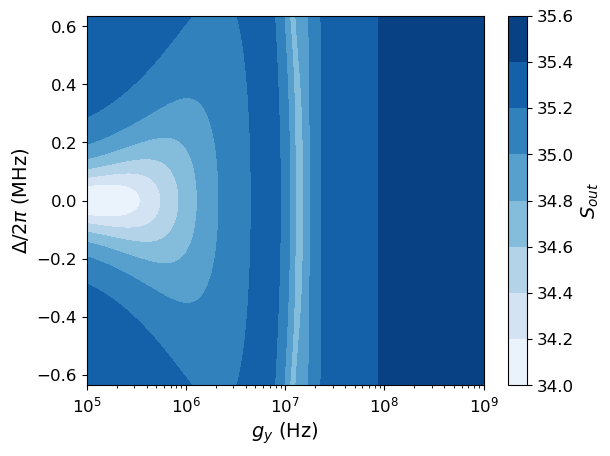

In [13]:
plt.figure(1)
plt.contourf(gym, Δm / (2 * np.pi * 1e6), gy_Δ_sweep_out_spec, cmap='Blues')
plt.xlabel("$g_y$ (Hz)")
plt.xscale('log')
plt.ylabel("$\\Delta / 2\\pi$ (MHz)")
plt.colorbar(label='$S_{out}$')

## Magnetic Field Sweep